<center><h1  style="color:white; background-color:#000000; border-radius: 0px; padding:25px;"> Rules extraction </h1></center>

This notebook illustrates rules extraction from decision trees.

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import time

import numpy as np

In [2]:
os.getcwd()

'/home/abdoulaye_sakho/S3/sirus/rules/notebooks'

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, accuracy_score,roc_auc_score

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from extract_rules.extractors import SirusDTreeClassifier,SirusRFClassifier,SirusGBClassifier
from extract_rules.visualization import show_rules

In [5]:
from extract_rules.building_extractors import SirusGBClassifierDouble

In [6]:
from sklearn import tree

## Load data :

In [7]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Single tree : 

In [10]:
# Usual DecisionTree
clf_dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
clf_dtree.fit(X_train, y_train)
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_proba_dtree = clf_dtree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

PR AUC : 0.9546052631578946
ROC AUC : 0.980263157894737
Accuracy : 0.9736842105263158


[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

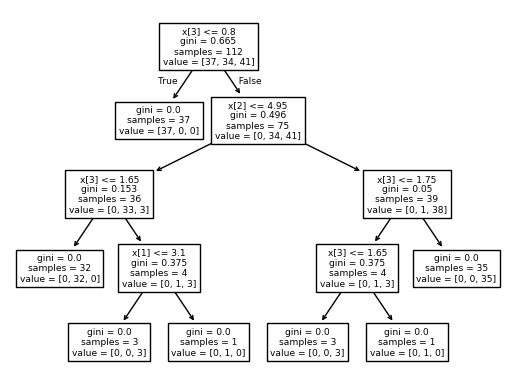

In [11]:
tree.plot_tree(clf_dtree)

In [12]:
## DecisionTree rules extraction
STree = SirusDTreeClassifier(max_depth=2,p0=0.1,quantile=10, random_state=0)
STree.fit(X_train,y_train)
y_pred_sirus = STree.predict(X_test)
y_pred_proba_sirus = STree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))

Pre-processing binarization took in fit_main_clasifier 0.0014 seconds
Grow forest took 0.0010 seconds
Linear dep post-treatment took 0.0018 seconds
Rules extraction took 0.0020 seconds
PR AUC : 0.9163432355967078
ROC AUC : 0.9802631578947368
Accuracy : 0.9473684210526315


In [13]:
STree.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
show_rules(STree,max_rules=16)

Estimated average rate for target class 1 (from 'else' clauses) p_s = 19%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                                     THEN P(C1)      ELSE P(C1)
--------------------------------------------------------------------------------
if   petal length <= 4.90                        then 44%                else 7%                
if   petal width <= 0.77                         then 0%                 else 45%               
if   petal width > 0.77 & petal length <= 4.90   then 94%                else 4%                


In [14]:
STree.n_features_in_

4

In [15]:
STree.n_classes_ > 2

np.True_

## Random forest : 

In [16]:
# Usual RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
start = time.time()
clf_rf.fit(X_train, y_train)
end = time.time()
y_pred_dtree = clf_rf.predict(X_test)
y_pred_proba_dtree = clf_rf.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.9780937683715462
ROC AUC : 0.996191135734072
Accuracy : 0.9736842105263158
Fitting time =  0.06291699409484863 s


In [17]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_depth=4,quantile=10,p0=0.01, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X_train,y_train)
end = time.time()
y_pred_sirus = RFSirus.predict(X_test,to_add_probas_outside_rules=True)
y_pred_proba_sirus = RFSirus.predict_proba(X_test,to_add_probas_outside_rules=True)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

Pre-processing binarization took in fit_main_clasifier 0.0013 seconds
Grow forest took 0.6034 seconds
Linear dep post-treatment took 0.0033 seconds
Rules extraction took 0.1925 seconds
All fit took 0.8959 seconds
Computing stability criterion...
***** 
 Stability criterion value: 0.0 
*****
PR AUC : 0.9770502645502646
ROC AUC : 0.9785318559556787
Accuracy : 0.9736842105263158
Fitting time =  0.9072341918945312 s


In [18]:
RFSirus.n_classes_ > 2

True

In [19]:
RFSirus.n_classes_

3

In [20]:
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']

In [36]:
show_rules(RFSirus,max_rules=20,target_class_index=2)

Estimated average rate for target class 2 (from 'else' clauses) p_s = 73%.
(Note: True average rate should be P(Class=2) from training data).

IF Condition                                      THEN P(C2)      ELSE P(C2)
---------------------------------------------------------------------------------
if   petal length <= 4.70                         then 2%                 else 87%               
if   petal length > 4.70 & petal length <= 5.10   then 45%                else 36%               
if   petal width <= 1.50                          then 3%                 else 91%               
if   petal width <= 0.40                          then 0%                 else 53%               
if   petal width <= 1.80                          then 5%                 else 97%               


## GB :

In [22]:
# Usual GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100,max_depth=3,criterion="squared_error",random_state=19)
start = time.time()
GB.fit(X_train, y_train)
end = time.time()
y_pred_dtree = GB.predict(X_test)
y_pred_proba_dtree = GB.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.9780937683715462
ROC AUC : 0.9951523545706371
Accuracy : 0.9736842105263158
Fitting time =  0.13606858253479004 s


In [23]:
# GradientBoostingClassifier rules extraction
GBSirus = SirusGBClassifier(n_estimators=1000,max_depth=3,p0=0.01,quantile=10,
                            learning_rate=0.1,subsample=1.0,criterion="squared_error",loss="log_loss", 
                            random_state=19,splitter="quantile")
start = time.time()
GBSirus.fit(X_train, y_train)
end = time.time()
y_pred_dtree = GBSirus.predict(X_test,to_add_probas_outside_rules=True)
y_pred_proba_dtree = GBSirus.predict_proba(X_test,to_add_probas_outside_rules=True)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

Pre-processing binarization took in fit_main_clasifier 0.0013 seconds
Grow forest took 0.9901 seconds
Computing stability criterion...
***** 
 Stability criterion value: 0.0 
*****
PR AUC : 0.95939365645248
ROC AUC : 0.993421052631579
Accuracy : 0.9736842105263158
Fitting time =  1.1013903617858887 s


In [24]:
y_pred_proba_dtree

array([[ 3.01939515e-05,  8.36991553e-02,  9.16270651e-01],
       [ 1.17274370e-03,  9.71009236e-01,  2.78180199e-02],
       [ 1.00025170e+00, -1.15820504e-02,  1.13303554e-02],
       [-3.17446456e-05, -1.87317851e-02,  1.01876353e+00],
       [ 1.00025170e+00, -1.15820504e-02,  1.13303554e-02],
       [ 6.88079550e-04,  1.01095499e-01,  8.98216421e-01],
       [ 1.00042301e+00,  2.05091000e-02, -2.09321144e-02],
       [ 4.12613181e-04,  8.83176759e-01,  1.16410628e-01],
       [ 1.32721924e-05,  7.83134626e-01,  2.16852102e-01],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 4.74551778e-04,  9.85607699e-01,  1.39177491e-02],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 1.32721924e-05,  7.83134626e-01,  2.16852102e-01],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 1.00025170e+00, -1.15820504e-02,  1.13303554e-02],
       [ 7.52107895e-05,  8.85565567e-01

In [32]:
GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
show_rules(GBSirus,max_rules=25,target_class_index=2)

Estimated average rate for target class 2 (from 'else' clauses) p_s = -29%.
(Note: True average rate should be P(Class=2) from training data).

IF Condition                                     THEN P(C2)      ELSE P(C2)
--------------------------------------------------------------------------------
if   petal width <= 1.14 & sepal width <= 3.20   then 43%                else 149%              
if   petal width <= 1.14 & sepal width > 3.20    then 0%                 else 97%               
if   petal width <= 0.40                         then -0%                else -10%              
if   sepal width <= 2.50                         then 54%                else 44%               
if   sepal width <= 3.20                         then -14%               else -6%               
if   petal width > 1.14 & petal width <= 1.80    then -662%              else -581%             
if   sepal width > 3.20 & petal width <= 0.40    then 0%                 else 12%               
if   sepal width <= 

In [26]:
y_pred_proba_dtree

array([[ 3.01939515e-05,  8.36991553e-02,  9.16270651e-01],
       [ 1.17274370e-03,  9.71009236e-01,  2.78180199e-02],
       [ 1.00025170e+00, -1.15820504e-02,  1.13303554e-02],
       [-3.17446456e-05, -1.87317851e-02,  1.01876353e+00],
       [ 1.00025170e+00, -1.15820504e-02,  1.13303554e-02],
       [ 6.88079550e-04,  1.01095499e-01,  8.98216421e-01],
       [ 1.00042301e+00,  2.05091000e-02, -2.09321144e-02],
       [ 4.12613181e-04,  8.83176759e-01,  1.16410628e-01],
       [ 1.32721924e-05,  7.83134626e-01,  2.16852102e-01],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 4.74551778e-04,  9.85607699e-01,  1.39177491e-02],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 1.32721924e-05,  7.83134626e-01,  2.16852102e-01],
       [ 7.52107895e-05,  8.85565567e-01,  1.14359223e-01],
       [ 1.00025170e+00, -1.15820504e-02,  1.13303554e-02],
       [ 7.52107895e-05,  8.85565567e-01

In [27]:
GBSirus.ridge.coef_

array([[-1.90065065e-03, -7.70506246e-01, -6.62112161e-01,
        -2.60160645e-03, -3.59870020e-04,  3.26372075e-04,
         7.85917182e-01, -6.22971942e-04,  1.02830098e-04,
        -2.43181540e-04],
       [-1.22521863e+00,  2.10820715e-02,  7.27781769e-01,
        -4.37619444e-01,  1.15035241e-01,  5.81353148e+00,
        -8.82981379e-01, -1.56065727e-01,  1.70055251e-01,
        -4.55522035e-02],
       [ 1.22711928e+00,  7.49424174e-01, -6.56696087e-02,
         4.40221051e-01, -1.14675371e-01, -5.81385785e+00,
         9.70641977e-02,  1.56688699e-01, -1.70158081e-01,
         4.57953850e-02]])

In [28]:
GBSirus.ridge.intercept_

array([ 1.00564317, -3.94290731,  3.93726414])

## New ones:
